In [1]:
!pip install tensorflow_datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()

print(tf.__version__)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0525 15:14:31.420028 4408829376 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset fashion_mnist downloaded and prepared to /Users/kianavillaera/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Colocations handled automatically by placer.


W0525 15:14:36.154127 4408829376 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [4]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(num_train_examples)
print(num_test_examples)

60000
10000


In [9]:
# Pre Processing

def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [10]:
train_dataset

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

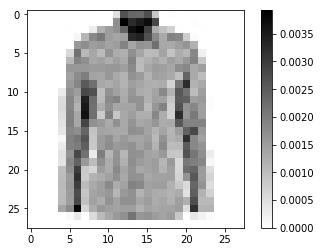

In [13]:
for image, label in test_dataset.take(1):
    break

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)

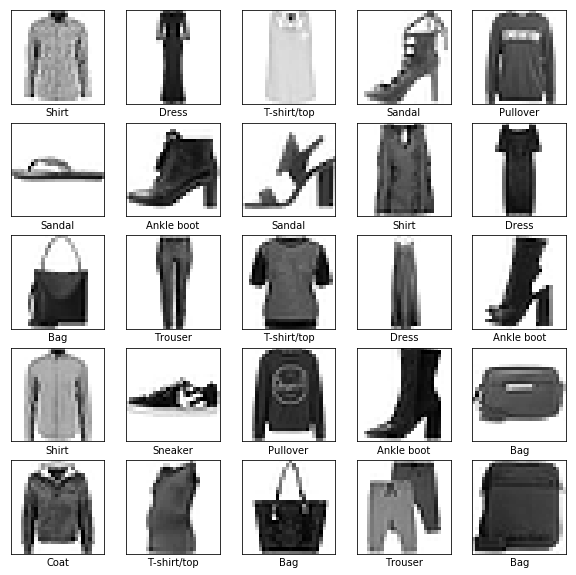

In [15]:
plt.figure(figsize=(10,10))
i = 0

for(image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [16]:
# Input -> Hidden Layer -> Output
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [17]:
# Compile the model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
batch_size = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [21]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 1.0673 - acc: 0.6607
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6376 - acc: 0.7711
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5562 - acc: 0.8005
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5202 - acc: 0.8140
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4890 - acc: 0.8274


In [22]:
# Evaluate the mode
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/batch_size))

313/313 [==============================] - 2s 5ms/step - loss: 0.5036 - acc: 0.8207


In [23]:
# Make predictions
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [24]:
predictions[0]

array([4.6802564e-03, 7.6795591e-04, 1.5486929e-01, 6.4063803e-03,
       3.4062460e-01, 1.4524970e-05, 4.8740497e-01, 3.3909160e-08,
       5.2316957e-03, 2.4395254e-07], dtype=float32)

In [25]:
np.argmax(predictions[0])

6

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

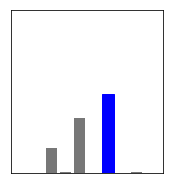

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_value_array(i,predictions,test_labels)